In [13]:
import numpy as np
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset
from ssapp.data.Metrics import relRMSE
from ssapp.Utils import train_test_dataloader_split
from torch.utils.data.dataloader import DataLoader
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt



In [14]:
dataset = load_serialized_dataset('CircularHornDataset1')

train_dataloader, val_dataloader = train_test_dataloader_split(dataset,batch_size = None,TRAIN_TEST_RATIO=0.7)

train_params, train_fields = next(iter(train_dataloader))

std_gp = Pipeline([('scaler', StandardScaler()), ('gp', GaussianProcessRegressor())])

def score(model,x,y):
    pred = model.predict(x)
    return relRMSE(y.reshape(len(y),-1),pred.reshape(len(pred),-1))


0.0036957274979061215

In [20]:
test_ratios =  np.linspace(0.01,0.99,20)
training_size = []
train_loss = []
val_loss = []



for idx,test_ratio in enumerate(test_ratios):
    train_dataloader, val_dataloader = train_test_dataloader_split(dataset,batch_size = None,TRAIN_TEST_RATIO=test_ratio)
    train_params, train_fields = next(iter(train_dataloader))
    training_size.append(len(train_params))
    val_params, val_fields = next(iter(val_dataloader))
    std_gp.fit(train_params,train_fields.reshape(len(train_fields),-1))

    train_loss.append(score(std_gp,train_params,train_fields))
    val_loss.append(score(std_gp,val_params,val_fields))
    print(idx/len(test_ratios))


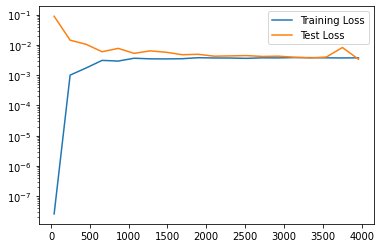

In [21]:
plt.figure()
plt.semilogy(training_size,train_loss,label = 'Training Loss')
plt.semilogy(training_size,val_loss,label = 'Val Loss')
plt.legend()